# Simple Exloratory Data Analysis

In [1]:
import os
import pandas as pd
import numpy as np
import scipy.stats as st
import missingno as msno

from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

%matplotlib inline

## # Read Dataset

In [2]:
tbc_dir = os.path.join('Health_DataSet', 'Tuberculosis incidence (per 100,000 people).csv')
u5_dir = os.path.join('Health_DataSet', 'Mortality rate, under-five (per 1,000 live births).csv')
adl_dir = os.path.join('Health_DataSet', 'Mortality rate, male adult (per 1,000 people).csv')
exp_dir = os.path.join('Health_DataSet', 'Current health expenditure (% of GDP).csv')

new_tbc_dir = os.path.join('clean_dataset', 'Tuberculosis incidence (per 100,000 people).csv')
new_u5_dir = os.path.join('clean_dataset', 'Mortality rate, under-five (per 1,000 live births).csv')
new_adl_dir = os.path.join('clean_dataset', 'Mortality rate, male adult (per 1,000 people).csv')
new_exp_dir = os.path.join('clean_dataset', 'Current health expenditure (% of GDP).csv')

tbc_cols = [1, 2, 4, 6, 8, 10, 12, 14, 16]
exp_cols = [1, 2, 4, 6, 8, 10, 12, 14, 16]
u5_cols = [1, 6, 8, 10, 12, 14, 16, 18, 20]
adl_cols = [1, 6, 8, 10, 12, 14, 16, 18, 20]

In [3]:
tbc_data = pd.read_csv(tbc_dir, 
                       sep=',',
                       usecols=tbc_cols, 
                       na_values = ['..', 'n.a', 'NaN'])
u5_data = pd.read_csv(u5_dir, 
                       sep=',',
                      usecols=u5_cols, 
                      na_values = ['..', 'n.a', 'NaN'])
adl_data = pd.read_csv(adl_dir, 
                       sep=',',
                       usecols=adl_cols, 
                       na_values = ['..', 'n.a', 'NaN'])
exp_data = pd.read_csv(exp_dir,  
                       sep=',',
                       usecols=exp_cols, 
                       na_values = ['..', 'n.a', 'NaN'])

In [4]:
print('Data Type : ')
print(exp_data.dtypes)
print('Data Shape : ', exp_data.shape)

Data Type : 
Country     object
2000       float64
2005       float64
2010       float64
2011       float64
2012       float64
2013       float64
2014       float64
2015       float64
dtype: object
Data Shape :  (188, 9)


In [5]:
print('Data Type : ')
print(u5_data.dtypes)
print('Data Shape : ', u5_data.shape)

Data Type : 
Country     object
2000       float64
2005       float64
2010       float64
2011       float64
2012       float64
2013       float64
2014       float64
2015       float64
dtype: object
Data Shape :  (193, 9)


In [6]:
print('Data Type : ')
print(adl_data.dtypes)
print('Data Shape : ', adl_data.shape)

Data Type : 
Country     object
2000         int64
2005       float64
2010       float64
2011       float64
2012       float64
2013       float64
2014       float64
2015       float64
dtype: object
Data Shape :  (188, 9)


In [7]:
print('Data Type : ')
print(tbc_data.dtypes)
print('Data Shape : ', tbc_data.shape)

Data Type : 
Country     object
2000       float64
2005       float64
2010       float64
2011       float64
2012       float64
2013       float64
2014       float64
2015       float64
dtype: object
Data Shape :  (194, 9)


## # Intersection Dataset by Country

In [8]:
tbc_country = set(tbc_data['Country'])
u5_country = set(u5_data['Country'])
adl_country = set(adl_data['Country'])
exp_country = set(exp_data['Country'])

In [9]:
intersec = tbc_country.intersection(u5_country)
intersec = intersec.intersection(adl_country)
intersec = intersec.intersection(exp_country)

In [10]:
country_tbc = tbc_data.set_index("Country")
country_u5 = u5_data.set_index("Country")
country_adl = adl_data.set_index("Country")
country_exp = exp_data.set_index("Country")

In [11]:
for country in tbc_data['Country']:
    if country not in intersec:
        country_tbc = country_tbc.drop(country, axis=0)
        
for country in u5_data['Country']:
    if country not in intersec:
        country_u5 = country_u5.drop(country, axis=0)
        
for country in adl_data['Country']:
    if country not in intersec:
        country_adl = country_adl.drop(country, axis=0)
        
for country in exp_data['Country']:
    if country not in intersec:
        country_exp = country_exp.drop(country, axis=0)

In [12]:
country_tbc.to_csv(new_tbc_dir)
country_u5.to_csv(new_u5_dir)
country_adl.to_csv(new_adl_dir)
country_exp.to_csv(new_exp_dir)

In [13]:
tbc_data = pd.read_csv(new_tbc_dir)
u5_data = pd.read_csv(new_u5_dir)
adl_data = pd.read_csv(new_adl_dir)
exp_data = pd.read_csv(new_exp_dir)

## # Visualising Missing Values

TBC :
 Country    0
2000       4
2005       1
2010       1
2011       0
2012       0
2013       0
2014       0
2015       0
dtype: int64


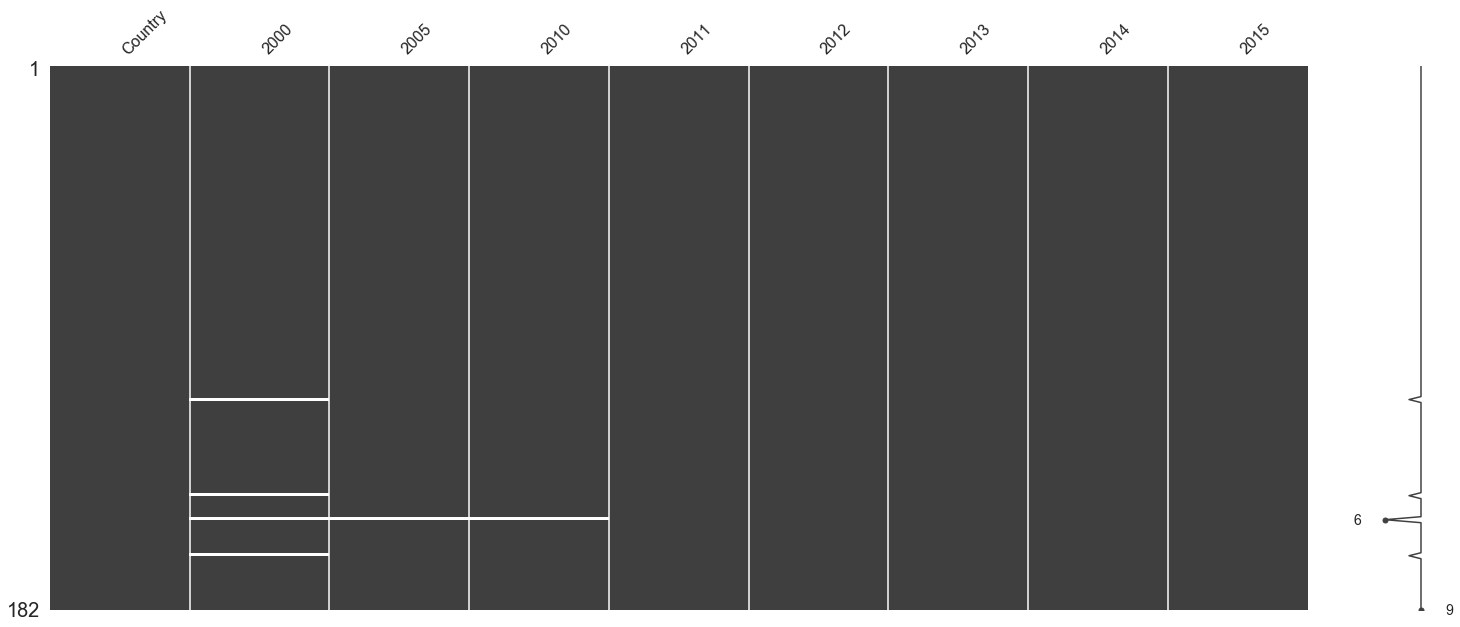

In [14]:
### TBC Data
print('TBC :\n', tbc_data.isna().sum())

msno.matrix(tbc_data);
plt.savefig(os.path.join('plot', 'tbc_missing_value.png'))

Under 5 mortality :
 Country    0
2000       0
2005       0
2010       0
2011       0
2012       0
2013       0
2014       0
2015       0
dtype: int64


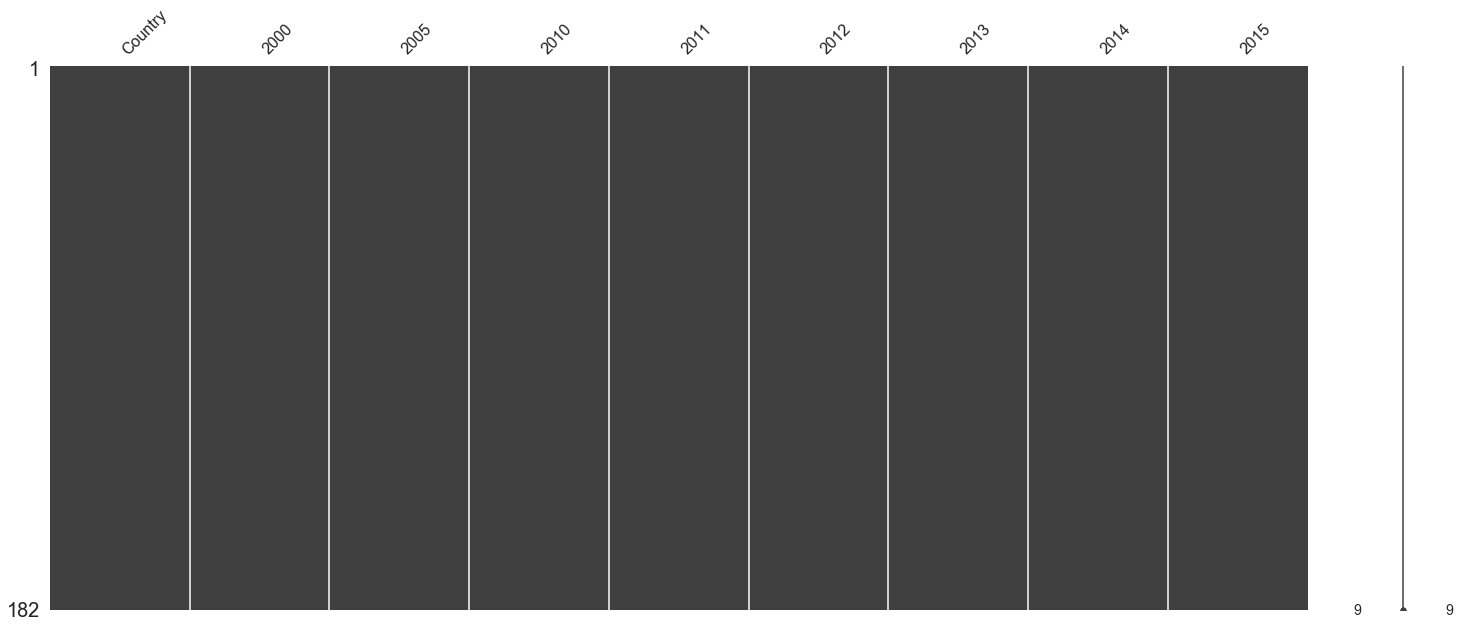

In [15]:
### Under 5 Data
print('Under 5 mortality :\n', u5_data.isna().sum())

msno.matrix(u5_data);
plt.savefig(os.path.join('plot', 'u5_missing_value.png'))

Adult mortality :
 Country     0
2000        0
2005        3
2010        3
2011        4
2012        5
2013        5
2014        8
2015       31
dtype: int64


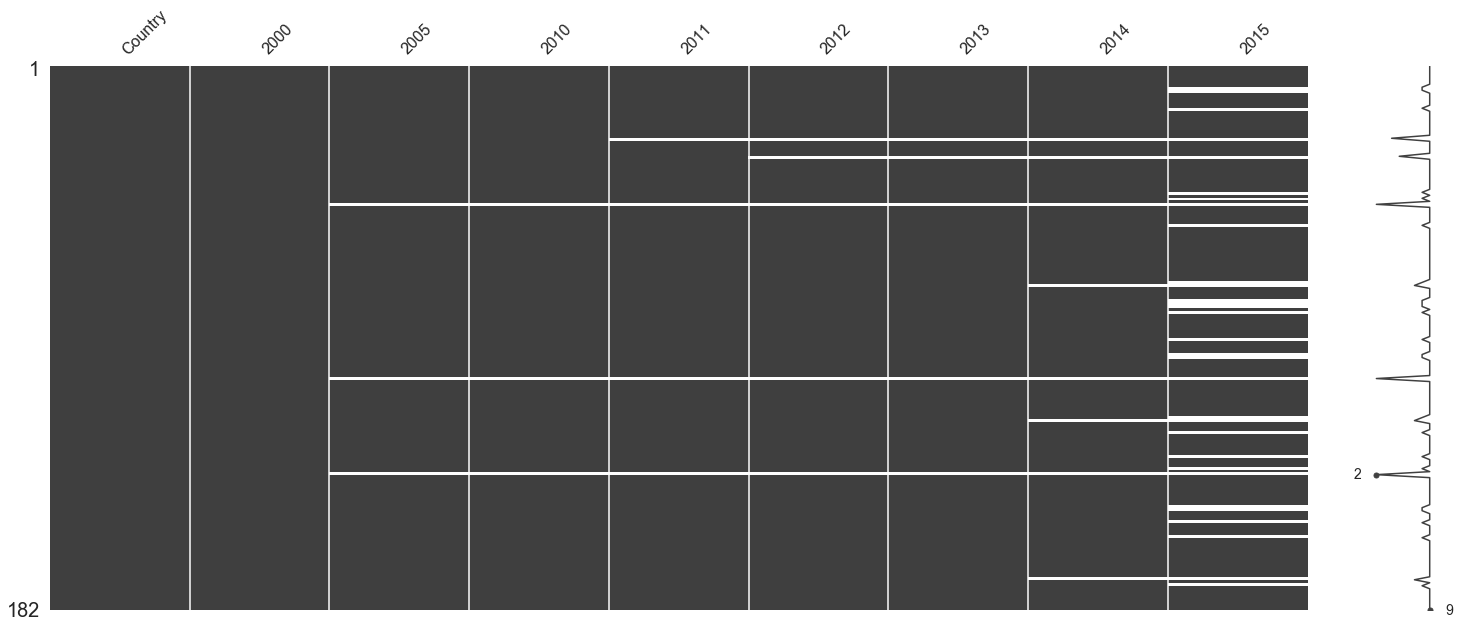

In [16]:
### Adult Data
print('Adult mortality :\n', adl_data.isna().sum())

msno.matrix(adl_data);
plt.savefig(os.path.join('plot', 'adl_missing_value.png'))

Expenditure  :
 Country    0
2000       5
2005       2
2010       2
2011       2
2012       1
2013       2
2014       2
2015       2
dtype: int64


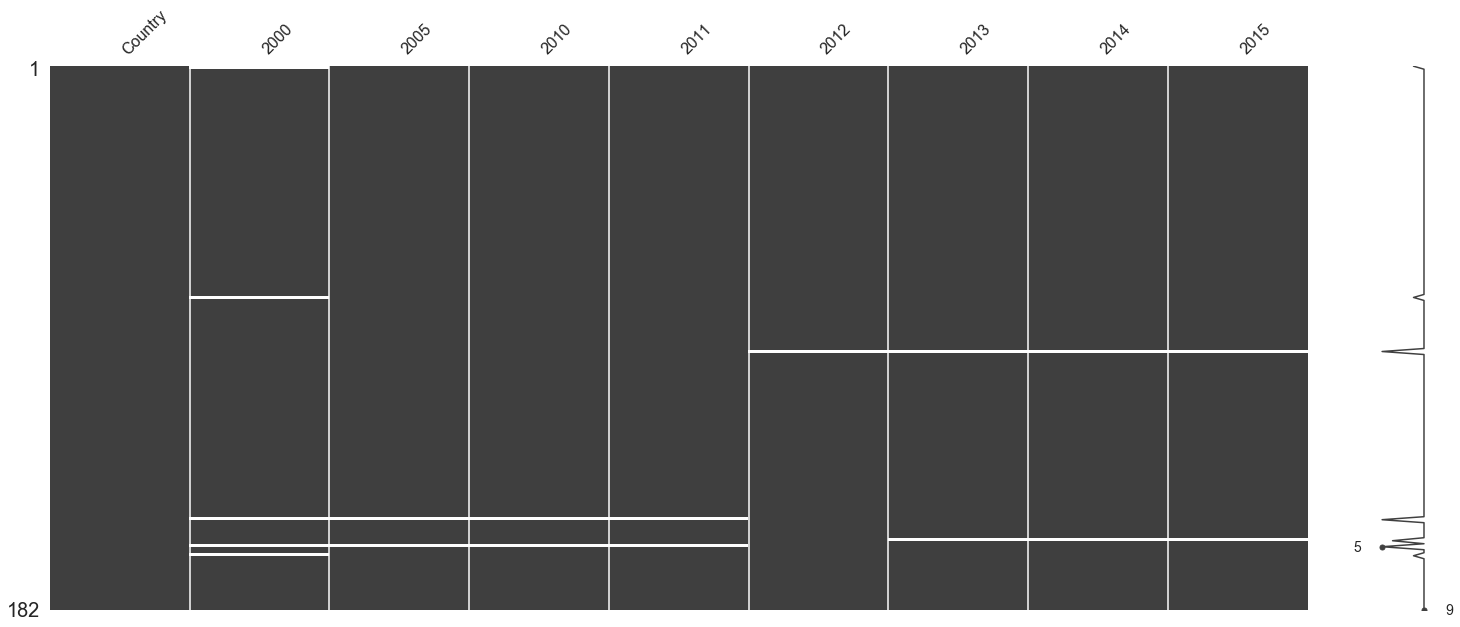

In [17]:
### Adult Data
print('Expenditure  :\n', exp_data.isna().sum())

msno.matrix(exp_data);
plt.savefig(os.path.join('plot', 'exp_missing_value.png'))

In [18]:
exp_data.shape

(182, 9)

## # Handle Missing Values

##### TBC Incidence

In [19]:
new_tbc_data = tbc_data

for col in new_tbc_data.columns[1:]:
    median = new_tbc_data[col].mean()
    new_tbc_data[col].fillna(median, inplace=True)

In [20]:
new_tbc_data.isna().sum()

Country    0
2000       0
2005       0
2010       0
2011       0
2012       0
2013       0
2014       0
2015       0
dtype: int64

##### Under 5 Incidence

In [21]:
new_u5_data = u5_data

for col in new_u5_data.columns[1:]:
    median = new_u5_data[col].mean()
    new_u5_data[col].fillna(median, inplace=True)

In [22]:
new_u5_data.isna().sum()

Country    0
2000       0
2005       0
2010       0
2011       0
2012       0
2013       0
2014       0
2015       0
dtype: int64

##### Adult Incidence

In [23]:
new_adl_data = adl_data

for col in new_adl_data.columns[1:]:
    median = new_adl_data[col].mean()
    new_adl_data[col].fillna(median, inplace=True)

In [24]:
new_adl_data.isna().sum()

Country    0
2000       0
2005       0
2010       0
2011       0
2012       0
2013       0
2014       0
2015       0
dtype: int64

##### Expenditure Incidence

In [25]:
new_exp_data = exp_data

for col in new_exp_data.columns[1:]:
    median = new_exp_data[col].mean()
    new_exp_data[col].fillna(median, inplace=True)

In [26]:
new_exp_data.isna().sum()

Country    0
2000       0
2005       0
2010       0
2011       0
2012       0
2013       0
2014       0
2015       0
dtype: int64

## # Relation Between Dataset

In [27]:
def plot_rel(year):
    plt.rcParams['figure.figsize'] = [20, 10]
    plt.plot(tbc_data['Country'], tbc_data[year], 'r')
    plt.plot(u5_data['Country'], u5_data[year], 'b')
    plt.plot(adl_data['Country'], adl_data[year], 'g')
    plt.plot(exp_data['Country'], exp_data[year], 'y')
    plt.xticks(rotation='vertical')
    plt.legend(['tbc', 'under 5 mortality', 'adult mortality', 'expenditure'])
    plt.title('Korelasi di Tahun '+year)
    plt.savefig(os.path.join('plot', year+'.png'))
    plt.show()

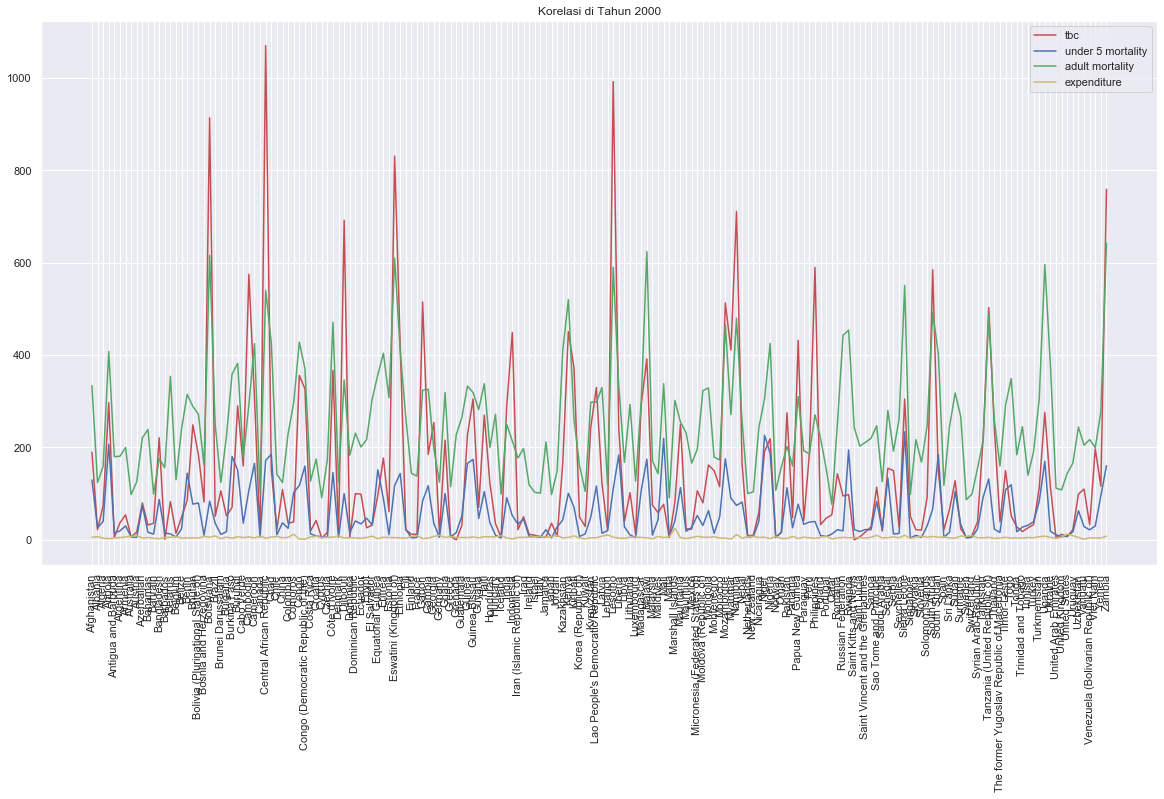

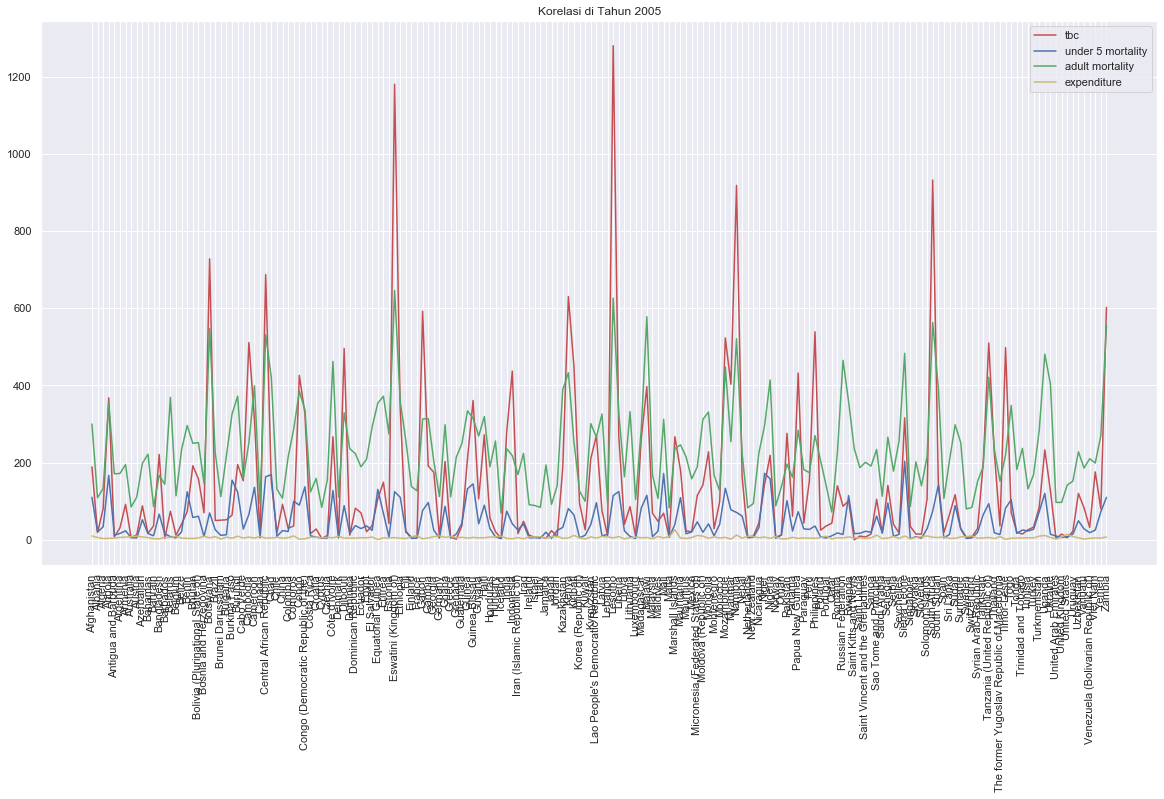

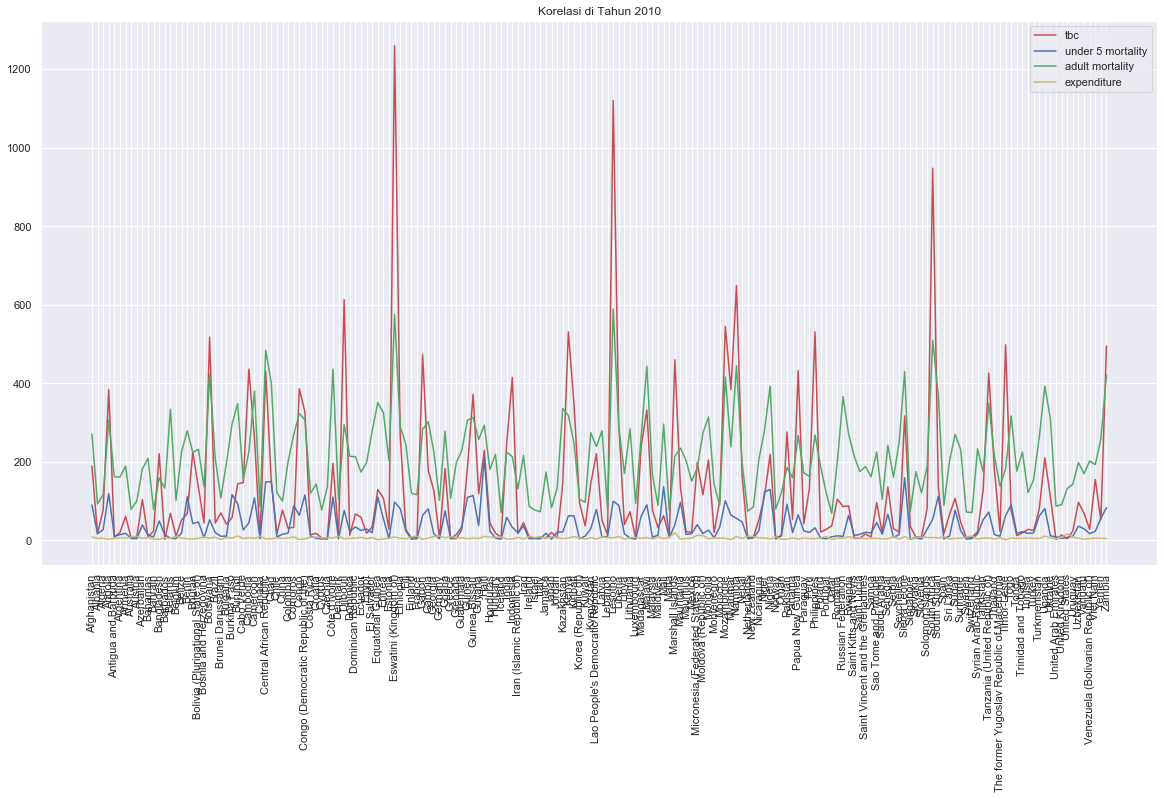

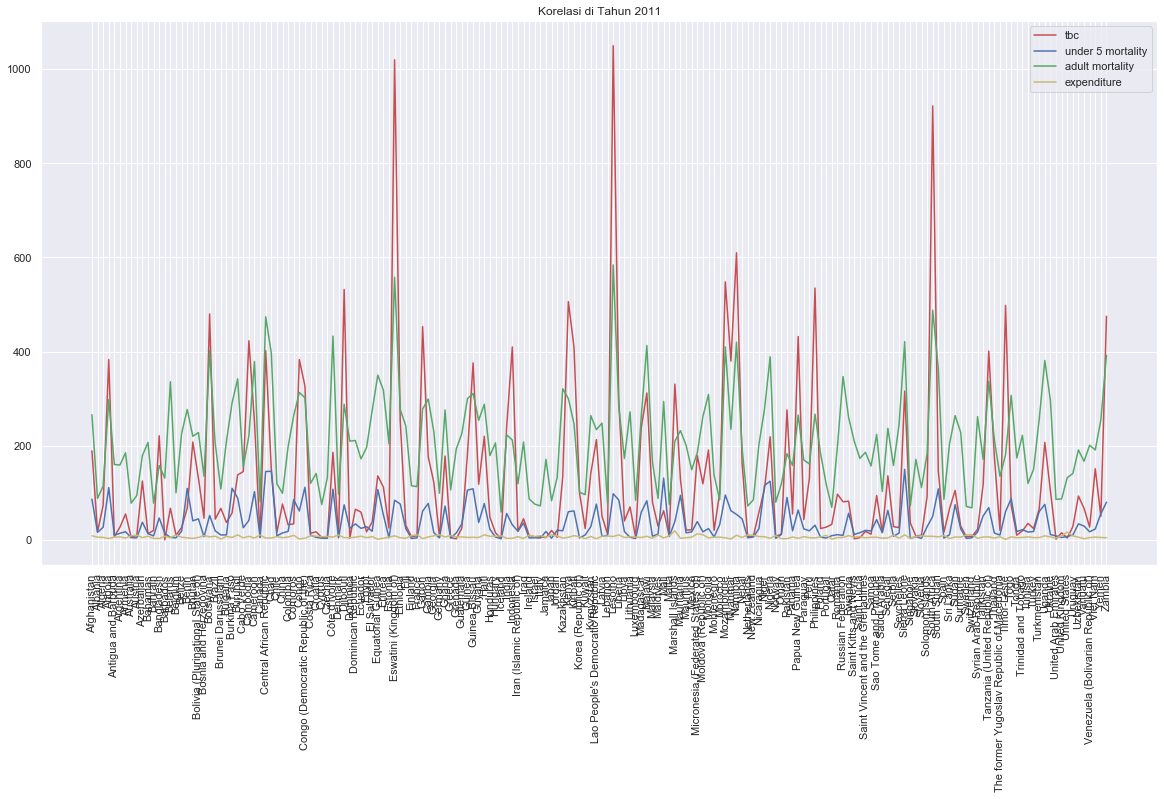

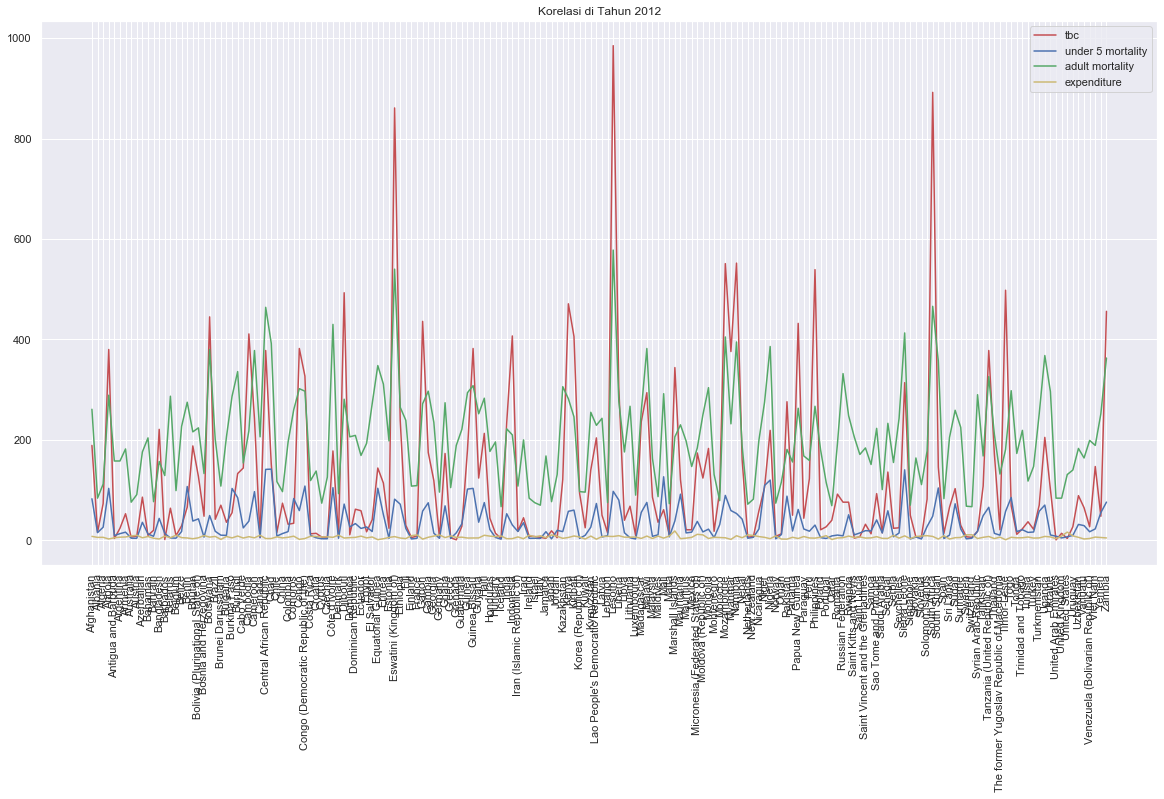

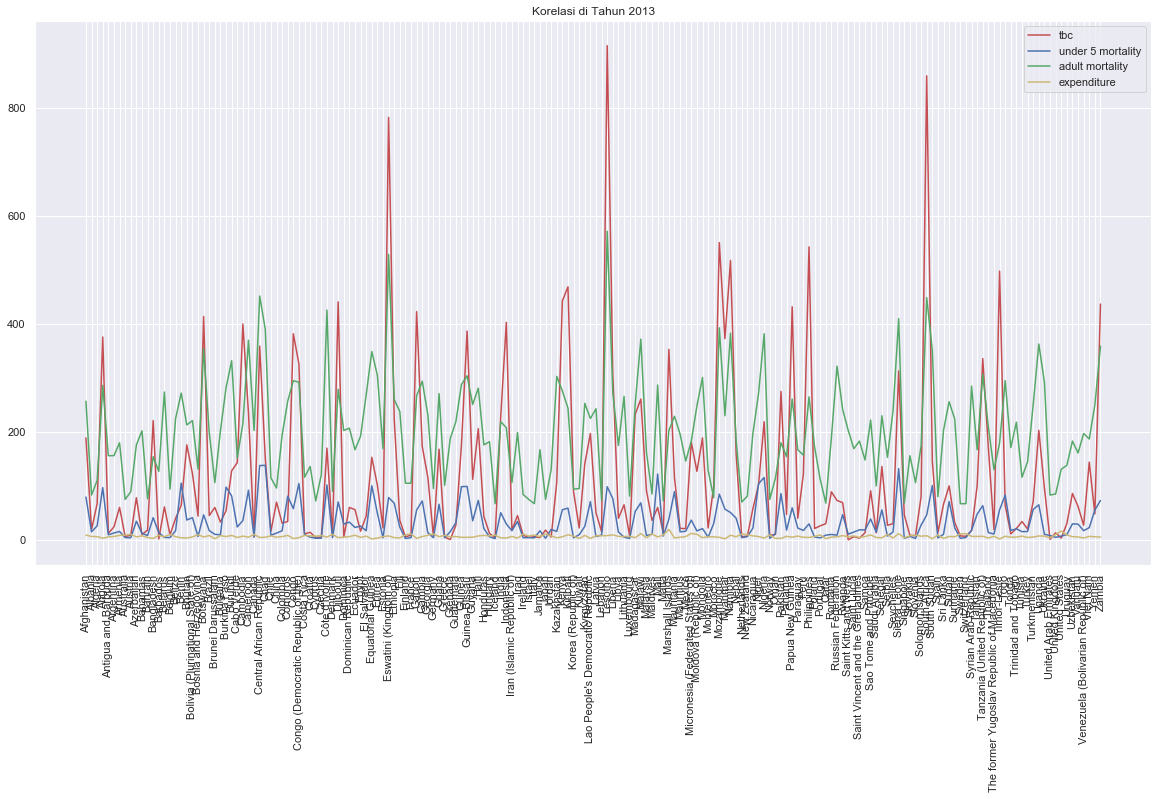

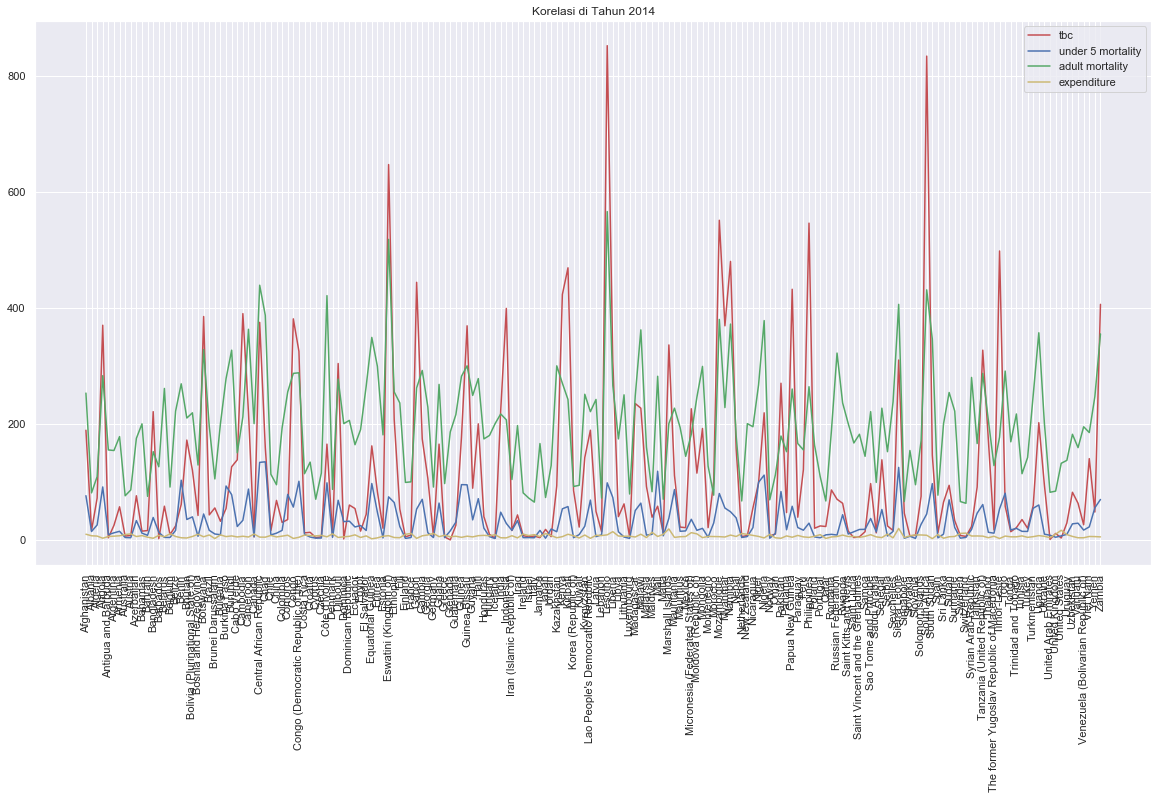

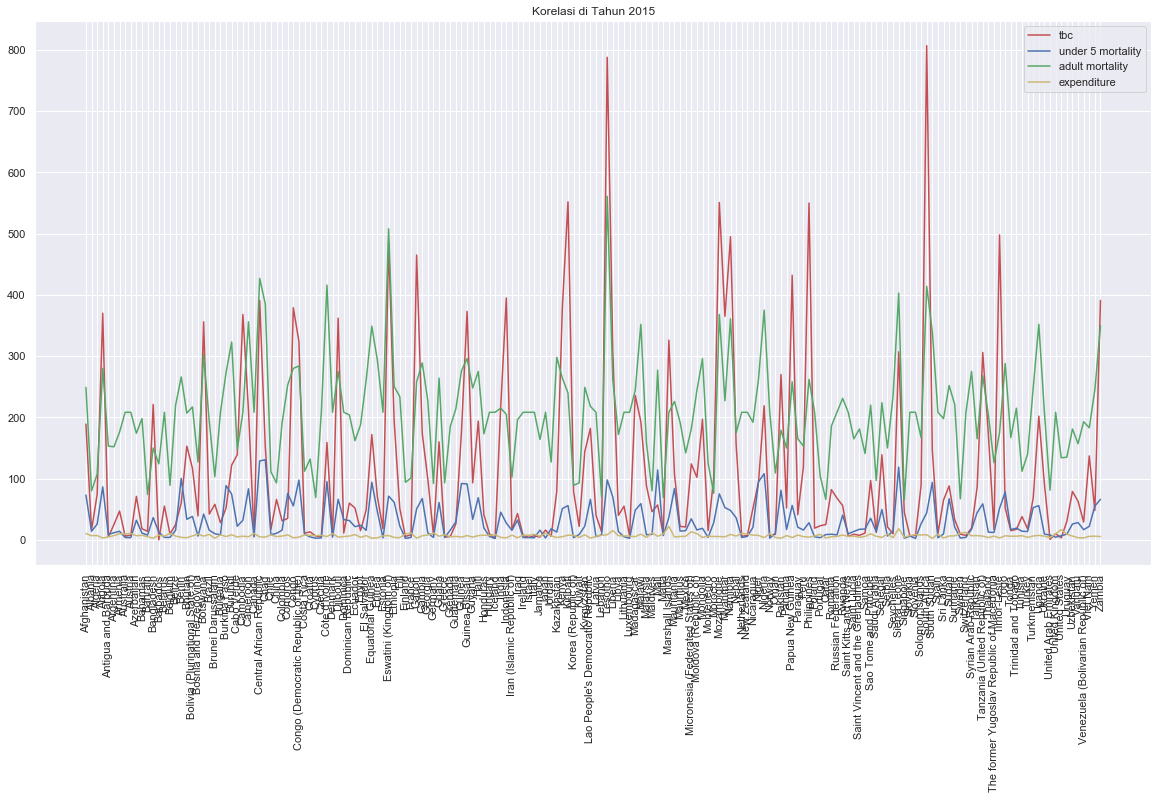

In [28]:
plot_rel('2000')
plot_rel('2005')
plot_rel('2010')
plot_rel('2011')
plot_rel('2012')
plot_rel('2013')
plot_rel('2014')
plot_rel('2015')

## # Data Distribution

In [29]:
def plot_sk(dataset_name, name):
    sns.distplot(dataset_name['2000'], kde=True, color='darkblue', axlabel='Negara')
    plt.savefig(os.path.join('plot', name+'_distribution.png'))
    plt.show()

##### TBC Incidence

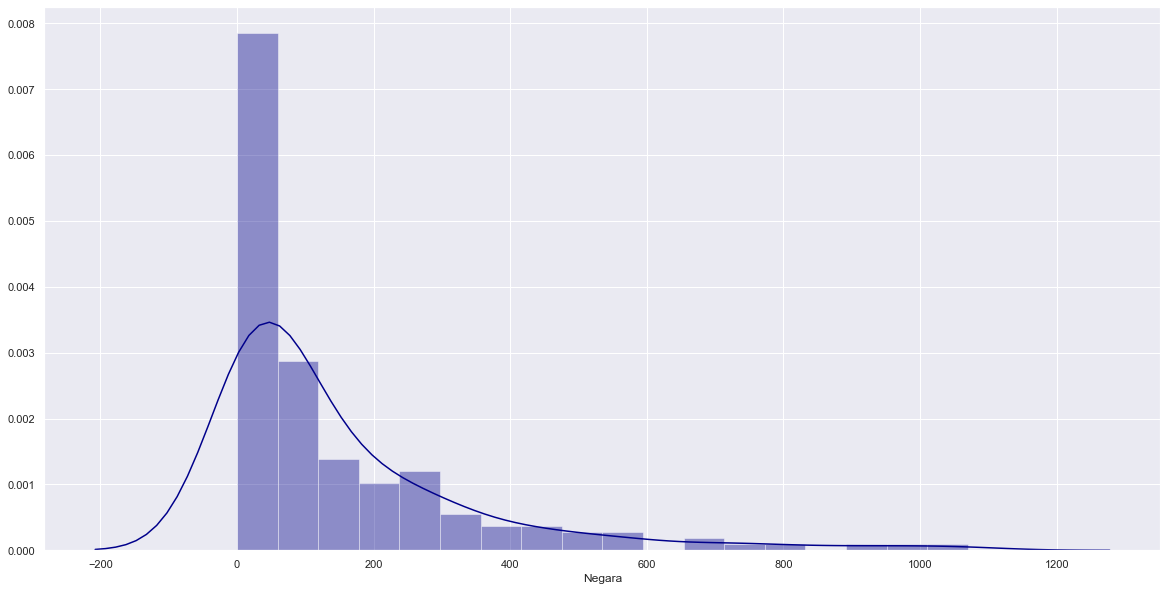

In [30]:
plot_sk(new_tbc_data, 'tbc')

##### Under 5 Incidence

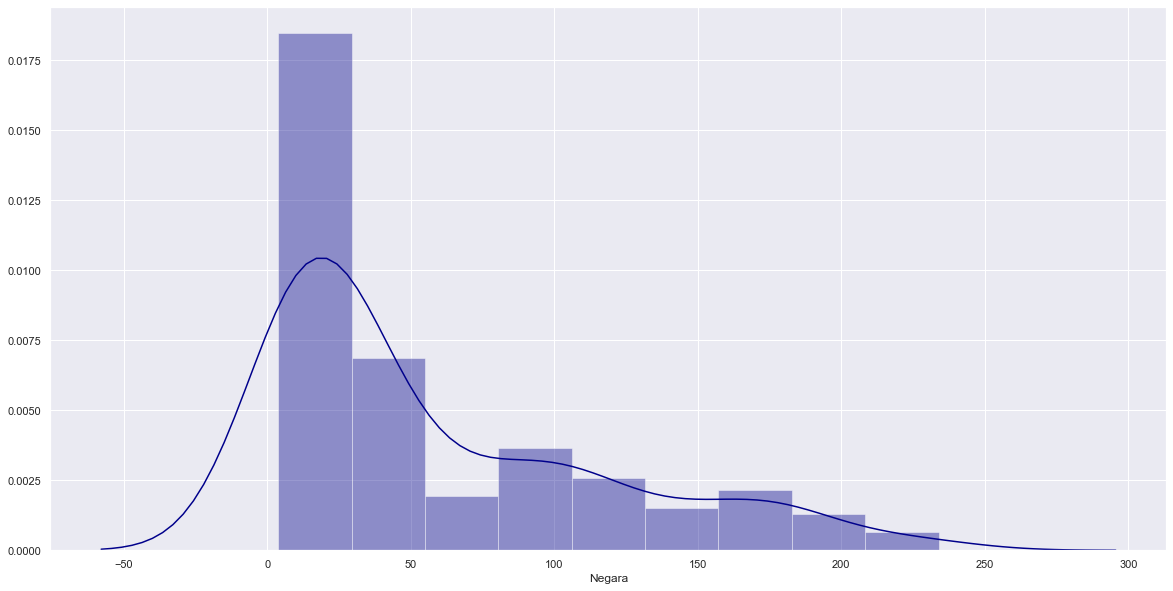

In [31]:
plot_sk(new_u5_data, 'u5')

##### Adult Incidence

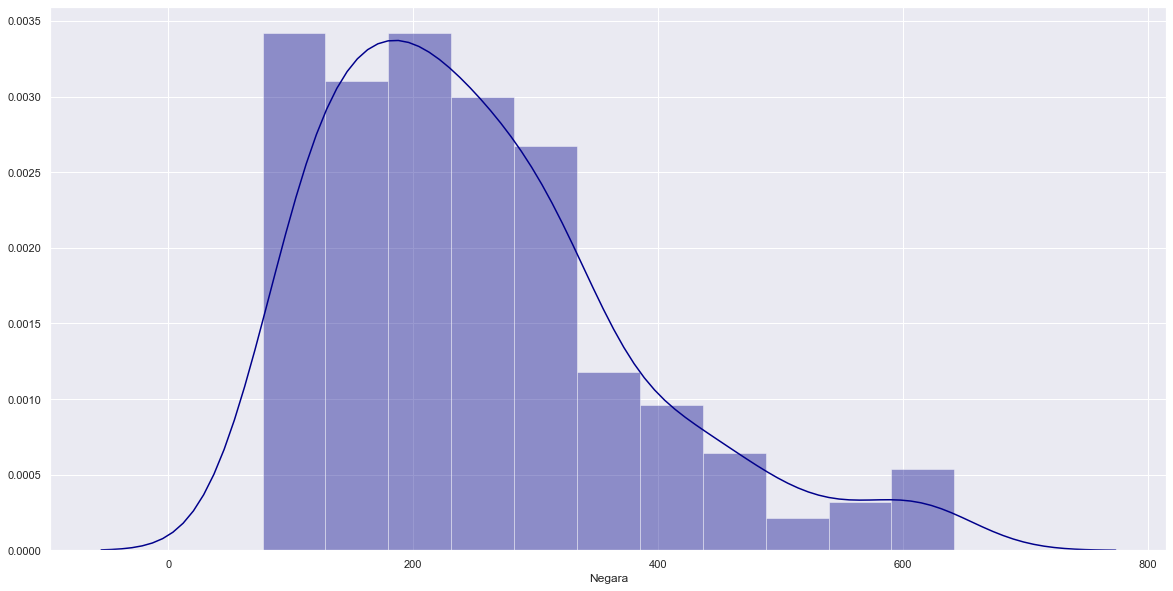

In [32]:
plot_sk(new_adl_data, 'adl')

##### Expenditure Incidence

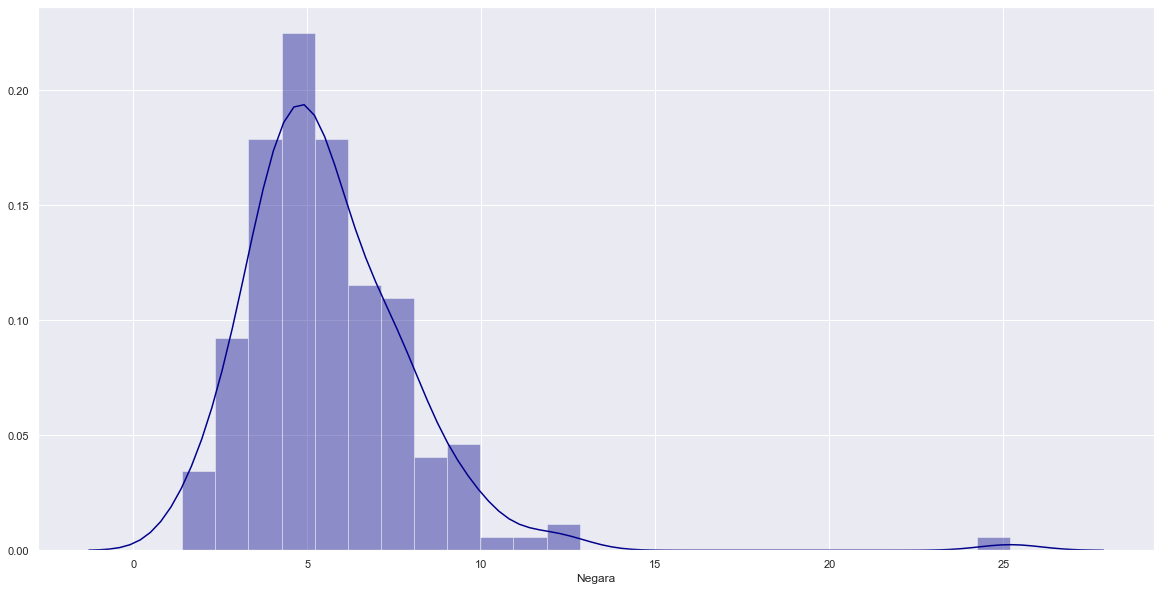

In [33]:
plot_sk(new_exp_data, 'exp')

## # Normalize Data

In [34]:
normalized_tbc = preprocessing.normalize(new_tbc_data.drop('Country', axis=1))
normalized_u5 = preprocessing.normalize(new_u5_data.drop('Country', axis=1))
normalized_adl = preprocessing.normalize(new_adl_data.drop('Country', axis=1))
normalized_exp = preprocessing.normalize(new_exp_data.drop('Country', axis=1))

In [35]:
new_tbc_data = pd.DataFrame({'Country': new_tbc_data['Country'], 
                             '2000':normalized_tbc[:, 0],
                             '2005':normalized_tbc[:, 1],
                             '2010':normalized_tbc[:, 2],
                             '2011':normalized_tbc[:, 3],
                             '2012':normalized_tbc[:, 4],
                             '2013':normalized_tbc[:, 5],
                             '2014':normalized_tbc[:, 6],
                             '2015':normalized_tbc[:, 7]
                            })

new_u5_data = pd.DataFrame({'Country': new_u5_data['Country'], 
                             '2000':normalized_u5[:, 0],
                             '2005':normalized_u5[:, 1],
                             '2010':normalized_u5[:, 2],
                             '2011':normalized_u5[:, 3],
                             '2012':normalized_u5[:, 4],
                             '2013':normalized_u5[:, 5],
                             '2014':normalized_u5[:, 6],
                             '2015':normalized_u5[:, 7]
                            })

new_adl_data = pd.DataFrame({'Country': new_adl_data['Country'], 
                             '2000':normalized_adl[:, 0],
                             '2005':normalized_adl[:, 1],
                             '2010':normalized_adl[:, 2],
                             '2011':normalized_adl[:, 3],
                             '2012':normalized_adl[:, 4],
                             '2013':normalized_adl[:, 5],
                             '2014':normalized_adl[:, 6],
                             '2015':normalized_adl[:, 7]
                            })

new_exp_data = pd.DataFrame({'Country': new_exp_data['Country'], 
                             '2000':normalized_exp[:, 0],
                             '2005':normalized_exp[:, 1],
                             '2010':normalized_exp[:, 2],
                             '2011':normalized_exp[:, 3],
                             '2012':normalized_exp[:, 4],
                             '2013':normalized_exp[:, 5],
                             '2014':normalized_exp[:, 6],
                             '2015':normalized_exp[:, 7]
                            })

## # Data Distribution after Normalization

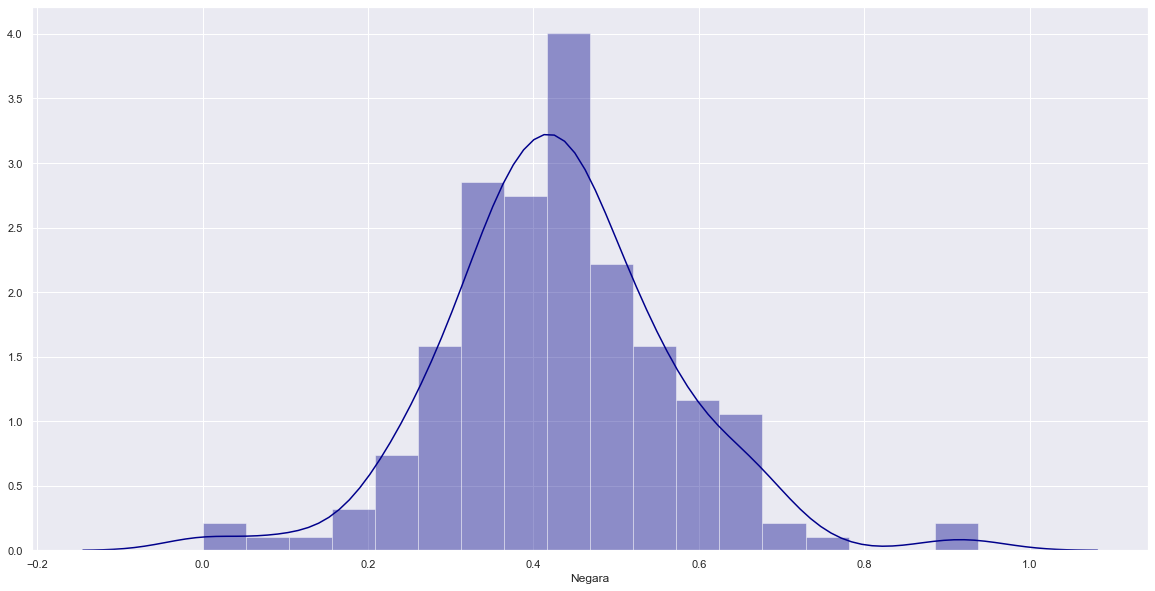

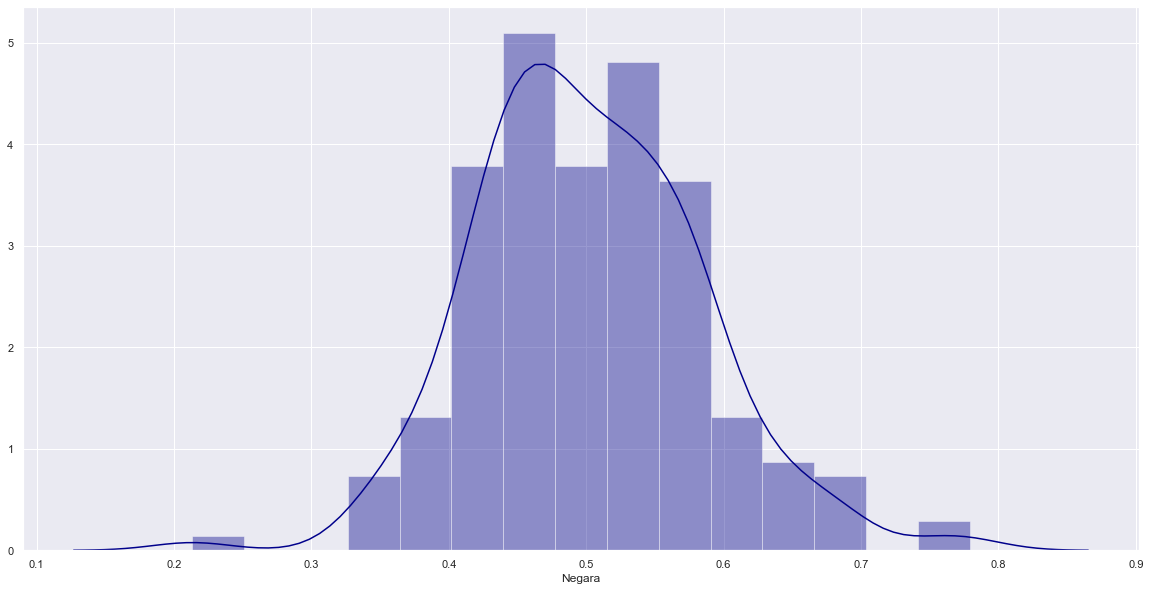

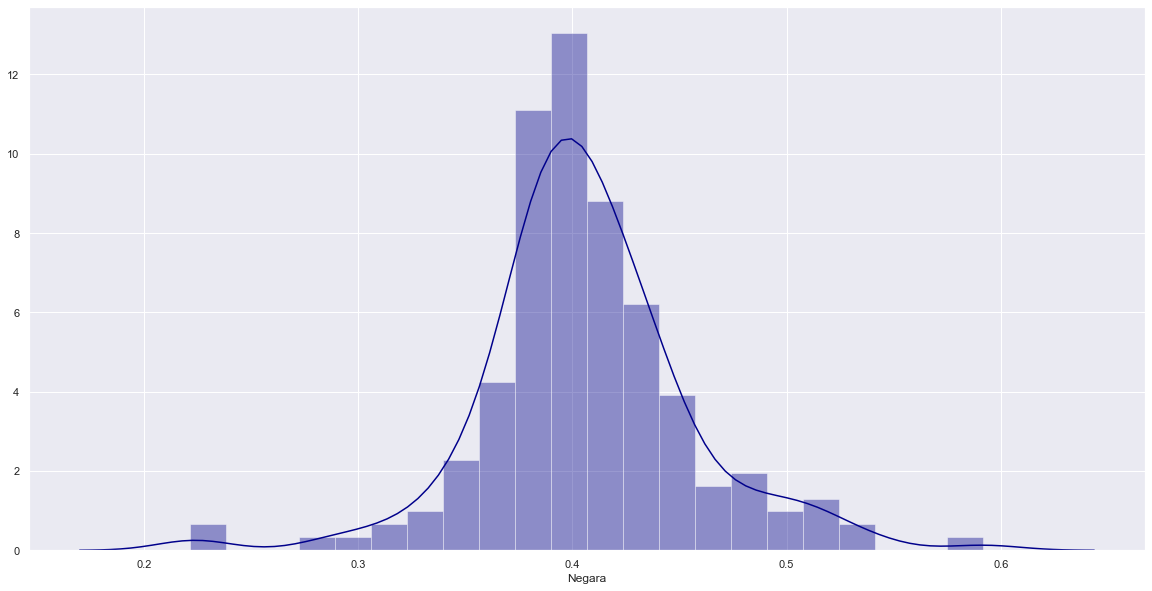

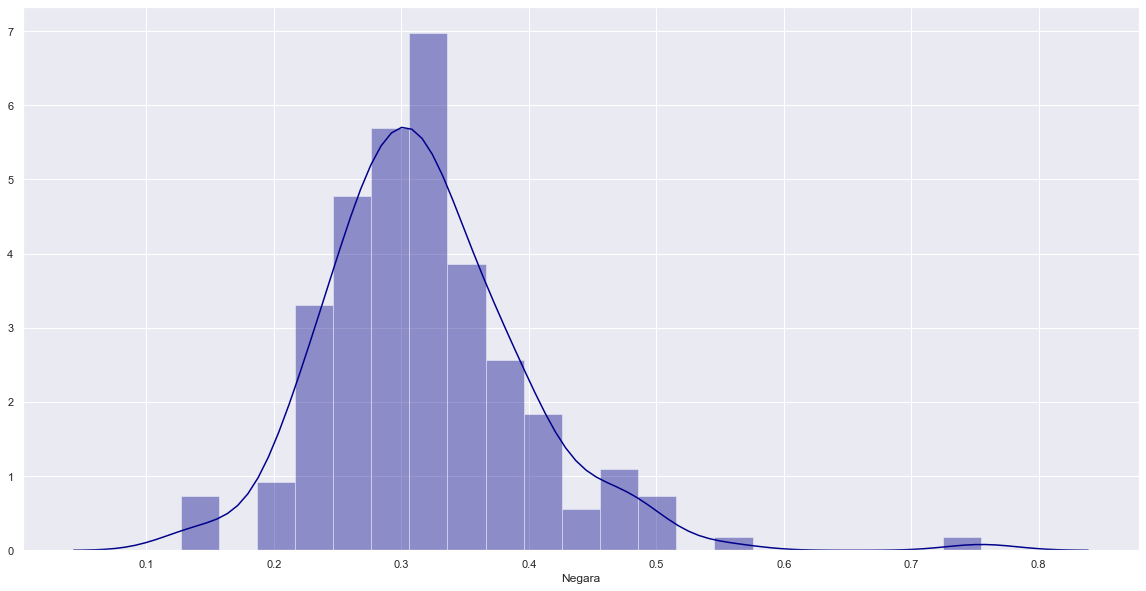

In [36]:
plot_sk(new_tbc_data, 'new_tbc')
plot_sk(new_u5_data, 'new_u5')
plot_sk(new_adl_data, 'new_adl')
plot_sk(new_exp_data, 'new_exp')

In [37]:
new_tbc_data.to_csv(new_tbc_dir, index=False)
new_u5_data.to_csv(new_u5_dir, index=False)
new_adl_data.to_csv(new_adl_dir, index=False)
new_exp_data.to_csv(new_exp_dir, index=False)